In [1]:
# These are helpful routines that will assist in building this book.
# You should run this block before anything else. There is no output expected.
from astrodynamicsbook.bookhelpers import *

loadLatexPreamble()

$
\DeclareMathOperator{\Tr}{Tr}
\def\bs{\boldsymbol}
\def\mf{\mathbf}
\def\mb{\mathbb}
\def\mc{\mathcal}
\def\rfr{\mathcal}
\def\grad{{\rm grad}}
\def\Re{{\rm Re}}
\def\Im{{\rm Im}}
\def\und{\underline}
\def\ovl{\overline}
\def\unb{\underbrace}
\def\Log{\mbox{Log}}
\def\bfomega{\bs \omega}
\def\bfalpha{\bs \alpha}
\def\da{\triangleq}
\newcommand{\leftexp}[2]{{\vphantom{#2}}^{#1}\!{#2}}
\newcommand{\leftsub}[2]{{\vphantom{#2}}_{#1}\!{#2}}
\newcommand{\omegarot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\omega}}^{\mathcal{#2}}}}
\newcommand{\alpharot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\alpha}}^{\mathcal{#2}}}}
\newcommand{\framerot}[2]{{\leftexp{\mathcal{#1}}{C}^{\mathcal{#2}}}}
\newcommand{\dframerot}[2]{{\vphantom{\dot{C}}^{\mathcal{#1}}\!{\dot{C}^{\mathcal{#2}}}}}
\newcommand{\bdot}[1]{\dot{\mathbf{#1}}}
\newcommand{\bhat}[1]{\hat{\mathbf{#1}}}
\newcommand{\mbhat}[1]{\hat{\mathbb{#1}}}
\def\iwb{\omegarot{I}{B}}
\def\iab{\alpharot{I}{B}}
\def\icb{\framerot{I}{B}}
\def\dif{\mathop{}\!\mathrm{d}}
\newcommand{\intd}[1]{\dif#1}
\newcommand{\od}[3][]{{ \frac{\dif{^{#1}}#2}{\dif{#3^{#1}}} }}			
\newcommand{\pd}[3][]{{ \frac{\partial{^{#1}}#2}{\partial{#3^{#1}}} }}	 
\newcommand{\md}[6]{{  \frac{\partial{^{#2}}#1}{\partial{#3^{#4}}\partial{#5^{#6}}} }}
\newcommand{\fddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{#1}}{\dif{t}}}  }}
\newcommand{\fdddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{^{2}#1}}{\dif{t^2}}}  }}
\newcommand{\ddt}[1][]{\fddt[#1]{I}}
$


In [2]:
# This is only here to create the navigation link:
genPrevLink()

# [Previous](<03-Tensors.ipynb>)

# Simple Rotations

We've loaded up on a *lot* of mathematical formalism, so let's try to bring ourselves back (slightly) to the physical realm, and think about how all of this is going to help us interpret the physics encoded by Newton's laws.  We've established that these laws encode vector quantities, but also that they deal with *changes* in those quantities (remember: the second law is about "the alteration of motion").  We know from a mathematical standpoint that the scalar multiplication operator allows us to change the magnitude of a vector without changing its direction.  There is a ready, intuitive, interpretation for what is happening here - we are scaling the size of our vector, either moving the points the vector joins in space further apart or closer together.  However, what can we say about the change in a vector's direction?  Let's try to look at the geometry of a rotation operation: changing the direction of a vector in space without altering its magnitude.  We will call this type of motion a **simple rotation**.

## Axis-Angle Representation of Simple Rotations
<p style="text-align:center;"><img src="img/simple_rotation2b.png" alt="Simple Rotation" width="600" id="fig:simprot1"/></p>

Consider the setup in the  <a href="#fig:simprot1" >figure</a>, above. We have two vectors $\mf a$ and $\mf b$, of equal magnitude, whose projections onto the shaded plane are separated by an angle $\theta$.  The direction $\bhat{n}$ is orthogonal to the plane, and is special, because it is the *only* direction in which the components of $\mf a$ and $\mf b$ are equal.  That is, we are positing that there exists a unit vector $\bhat n$ such that $\bhat n \cdot \mf b \equiv \bhat n \cdot \mf a$, and further that this vector is unique for the assumed geometry. $\bhat{n}$ is known as the **axis of rotation** (sometimes called the Euler axis)while $\theta$ is the **angle of rotation** and jointly, they form the **axis-angle** representation of a simple rotation.

## The Rodrigues Equation

We would like to describe the relationship between the $\mf a$ and $\mf b$ vectors, which will hopefully allow us to derive a rotation operator that we can apply in general.   We start by decomposing the two vectors into components in the $\bhat n$ direction and the plane orthogonal to $\bhat n$, as shown in the <a href="#fig:simprot1" >figure</a>.  The projection of each vector into the $\bhat{n}$ direction is given by $(\mf a \cdot \bhat{n})\bhat{n}$ and $(\mf b \cdot \bhat{n})\bhat{n}$.  Remember that we have specifically selected $\bhat{n}$ such that these two quantities are identical. The remainder of each vector (the parts that lie in the shaded plane) can be found by subtracting these projections from the original vector.   Thus, what we are doing is writing:
$$\mf a = (\mf a \cdot \bhat{n})\bhat{n} + \left(\mf a - (\mf a \cdot \bhat{n})\bhat{n}\right) \\
\mf b = (\mf b \cdot \bhat{n})\bhat{n} + \left(\mf b - (\mf b \cdot \bhat{n})\bhat{n}\right)  = (\mf a \cdot \bhat{n})\bhat{n} + \left(\mf b - (\mf a \cdot \bhat{n})\bhat{n}\right)$$
where in the final line, we have applied our assumption that $(\mf a \cdot \bhat{n})\bhat{n} \equiv (\mf b \cdot \bhat{n})\bhat{n}$.  Since nothing of interest is happening in the $\bhat{n}$ direction, let's ignore it for now and just focus on the plane orthogonal to $\bhat{n}$:

<p style="text-align:center;"><img src="img/simple_rotation3b.png" alt="Plane orthogonal to simple rotation axis" width="300" id="fig:simprot2"/></p>

Let's get oriented in this new  <a href="#fig:simprot2" >figure</a>. The shaded plane is exactly the same as in the preceding  <a href="#fig:simprot1" >figure</a>. The horizontal line is the component of the original $\mf a$ vector that lies in the plane orthogonal to $\bhat{n}$.  The diagonal line is the component of the original $\mf b$ vector that lies in this plane.  By our system definition, the angle between these two vectors is $\theta$.  Finally, we are going to add a new thing (the vertical line) to represent the direction (still in the same plane) that is orthogonal to the $\mf a$ component in the plane.  We do so by taking advantage of the properties of cross products, and crossing the $\mf a$ in-plane component with $\bhat{n}$, which we know to be orthogonal to the plane.


<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Convince yourself that $$\left(\mf a - (\mf a \cdot \bhat{n})\bhat{n}\right), \bhat{n} \times \left(\mf a - (\mf a \cdot \bhat{n})\bhat{n}\right), \bhat{n}$$
   are mutually orthogonal, and furthermore form a right-handed set, in the order given (i.e., akin to a reference frame, but with some non-unit magnitudes).
</div>

Our reason for defining this direction that is orthogonal to the projected part of $\mf a$ is that we can now decompose the projection of $\mf b$ into two independent components.  We can either work out the relevant dot products to do this, or, by inspection, rely on our knowledge of trigonometry and right triangles to write:
$$\mf b - (\mf a \cdot \bhat{n})\bhat{n} = \cos\theta\left(\mf a - (\mf a \cdot \bhat{n})\bhat{n}\right) + \sin\theta \left(\bhat{n} \times \left(\mf a - (\mf a \cdot \bhat{n})\bhat{n}\right)\right) $$

<div class="alert alert-block alert-danger">
Do not proceed until you agree with this equation.  Remember that we posited that $\mf a$ and $\mf b$ have equal magnitudes.  Seriously.  Just stop and stare at this for a while until you're 100% comfortable with it.
</div>

We're going to take advantage of the fact that both scalar multiplication and the dot product are commutative, so every $(\mf a \cdot \bhat{n})\bhat{n}$ term is equivalent to $\bhat{n}(\bhat{n}\cdot \mf a)$, and look more closely at the final term multiplying $\sin\theta$.  Remember that the cross product is distributive over vector addition, so we can write: 
$$\bhat{n} \times \left(\mf a - \bhat{n}(\bhat{n}\cdot \mf a)\right) = \bhat{n} \times \mf a  - \bhat{n} \times \bhat{n}(\bhat{n}\cdot \mf a) =  \bhat{n} \times \mf a  $$
where the final simplification comes from the fact that the last term in the penultimate expression contain $\bhat{n} \times \bhat{n}$, which is zero.

With these substitutions and simplifications, let's rewrite this expression to isolate $\mf b$ on the left-hand side (poor, lonely $\mf b$ - don't worry, we'll get you some new friends soon). We're also going to take advantage of the commutative nature of scalar multiplication to re-order some of the terms.  When the smoke clears, we have:
$$\mf b = \cos\theta \mf a + (1 - \cos\theta)\bhat{n}(\bhat{n}\cdot \mf a) + \sin\theta \bhat{n} \times \mf a$$

Why have we done any of this?  Well, if you squint hard enough at this expression, you might note that every term contains a factor of $\mf a$.  We started down this road with the hope of getting some new insight into the relationship between $\mf b$ and $\mf a$, and now we seem tantalizingly close, with $\mf b$ isolated to one side, and the other side being heavily populated by $\mf a$ values. The question is, can we factor out the $\mf a$ instances on the right-hand side?  Turns out, yes, we absolutely can, again leveraging the fact that the dot product is distributive over every relevant operator here.  Here's how it goes:
$$\mf b = \cos\theta \underbrace{\mf a}_{\displaystyle \mb U \cdot \mf a} + (1 - \cos\theta)\underbrace{\bhat{n}(\bhat{n}\cdot \mf a)}_{\displaystyle (\bhat{n}\otimes\bhat{n})\cdot \mf a} + \sin\theta \underbrace{\bhat{n} \times \mf a}_{\displaystyle \mbhat{n}_\times \cdot \mf a}$$

The first substitution is definitional - the identity element $\mb U$, when dotted with any vector returns the same vector.  The second substitution stems from our previous exploration of vector-dyadic dot products, and we have already verified an expression of this exact form.  Finally, the third substitution relates to our previous discussion on how any vector cross product can be represented by a dyadic-vector dot product via the introduction of the dyadic whose components are the cross-product equivalent matrix.  Basic message: we did the hard work already, and are now reaping the fruits of that labor. 

And what is it, exactly, that we are reaping here?  Well, we can now go ahead and factor out that $\cdot \mf a$ term from all three parts of the right-hand side of our equation, to find the **Rodrigues equation** (or Rodrigues's rotation formula), named after French banker, mathematician, social crusader, and coiner of the term avant-garde (in its modern artistic usage), Olinde Rodrigues: 

<div class="alert alert-block alert-info">
$$ \mf b = \left(\cos\theta \mb U  +  (1 - \cos\theta)\bhat{n}\otimes\bhat{n} + \sin\theta \mbhat n_\times \right) \cdot \mf a $$ 
</div>

## The Rotation Dyadic
So what have we learned here? The whole expression on the right-hand side of the Rodrigues equation being dotted with $\mf a$ is itself a dyadic (every individual term is a dyadic, and the sum of dyadics is a dyadic).  We can make it explicit by defining it:
$$\mb R \triangleq \cos\theta \mb U  +  (1 - \cos\theta)\bhat{n}\otimes\bhat{n} + \sin\theta \mbhat n_\times$$
which means that $\mf b = \mb R \cdot \mf a$.  This is exactly what we wanted.  There exists a single operator, which we will call the **rotation dyadic** ($\mb R$), which is defined solely in terms of the axis and angle of a rotation, that exactly transforms a vector $\mf a$ into a vector $\mf b$, rotated about axis $\bhat{n}$ by a counter-clockwise angle $\theta$, while preserving the vector's magnitude.

It is difficult to overstate the importance of what we have just found.  The existence of the rotation dyadic is fundamentally key to essentially all of our future explorations, but, on its own, it has not quite yet demonstrated its full utility.  To see that, we're going to have to introduce some reference frames and look at the component representation of this tensor quantity.

# Reference Frame Rotation 
 
We derived the rotation dyadic simply by positing a vector $\mf a$ being rotated into a vector $\mf b$.  Along the way, we provided ourselves with a working definition of rotation: that there existed some axis $\bhat{n}$, in the direction of which $\mf a$ and $\mf b$ retained the exact same component, while all of the change occurred in the plane orthogonal to $\bhat{n}$, in which the projections of the two vectors were separated by an angle $\theta$.  Following our right-hand rule convention, we also posited that $\theta$ was defined to be positive in the counter-clockwise direction. 

<div class="alert alert-block alert-danger">
The concept of counter-clockwise can be tricky.  Remember: we think about this in the context of the right-hand rule, and so our vantage point is looking <i>down</i> the axis of rotation.  So, in your mind, orient the plane orthogonal to $\bhat{n}$ such that the $\bhat{n}$ vector is pointing straight at you.  The plane is now the face of a clock, and counter-clockwise is explicitly defined in this orientation. 
</div>

<p style="text-align:center;"><img src="img/simple_rotation_b.png" alt="Simple rotation with reference frames" width="800" id="fig:simprot3"/></p>

We are going to continue with the mental picture of a vector $\mf a$ rotating into a vector $\mf b$ about an axis $\bhat{n}$, but we are now going to attach a reference frame $\mc A = (\bhat{a}_1, \bhat{a}_2, \bhat{a}_3)$ to $\mf a$, and a reference frame $\mc B = (\bhat{b}_1, \bhat{b}_2, \bhat{b}_3)$ to $\mf b$.  These two reference frames rotate with their respective vectors, and are exactly aligned (such that $\bhat{a}_i \equiv \bhat{b}_i$) when $\mf a$ is aligned with $\mf b$ (i.e., prior to the rotation).  In our new  <a href="#fig:simprot3" >figure</a>, the two dashed lines define the plane orthogonal to the axis of rotation $\bhat{n}$. 
We have now effectively extended our concept of simple rotations beyond pairs of vectors to pairs of reference frames.  Remember also that reference frames are identical to rigid bodies (this point is highlighted by the addition of the wireframe box in the <a href="#fig:simprot3" >figure</a>), and so we can equivalently apply simple rotations to bodies, reference frames and vectors.

The important thing to remember here is that *every single thing* we said about the geometric relationship between $\mf a$ and $\mf b$ equivalently holds for each pair of frame unit vectors $\bhat{a}_i$ and $\bhat{b}_i$ (for i = 1,2,3). The first of those important things was: the component of the vector undergoing a simple rotation that lies in the direction of the axis of rotation *does not change*.  So what does that tell us about the components of $\bhat{n}$ in the $\mc A$ and $\mc B$ frames? We can write:
$$[\bhat{n}]_\mc A = \begin{bmatrix} \bhat{n} \cdot \bhat{a}_1 \\  \bhat{n} \cdot \bhat{a}_2  \\ \bhat{n} \cdot \bhat{a}_3 \end{bmatrix}_\mc A \quad \textrm{and} \quad [\bhat{n}]_\mc B = \begin{bmatrix} \bhat{n} \cdot \bhat{b}_1 \\  \bhat{n} \cdot \bhat{b}_2  \\ \bhat{n} \cdot \bhat{b}_3 \end{bmatrix}_\mc B $$
but $\bhat{a}_i$ and $\bhat{b}_i$ are pairs of vectors undergoing a simple rotation about $\bhat{n}$.  Dotting them with $\bhat{n}$ is literally "taking the component in the direction of $\bhat{n}$" and so, by our postulated behavior of simple rotations $\bhat{n} \cdot \bhat{a}_i \equiv \bhat{n} \cdot \bhat{b}_i$ and
<div class="alert alert-block alert-info">
$$ [\bhat{n}]_\mc A \equiv [\bhat{n}]_\mc B$$
</div>

<div class="alert alert-block alert-danger">
    Warning! The rotation axis is the <b>only</b> vector whose components are the same in two different frames. In general, unless frames $\mc A$ and $\mc B$ are aligned (equivalent), then for an arbitrary vector $\mf r$, $[\mf r]_\mc A \ne [\mf r]_\mc B$
</div>

Let's cement this in our minds: when two reference frames are related by a simple rotation about rotation axis $\bhat{n}$, this unit vector is special because it is the **only** unit direction that has exactly the same components in both frames.  The other way of saying this is that the rotation dyadic has no effect on the rotation axis.  Let's evaluate $\mb R \cdot \bhat{n}$ via the Rodrigues equation:
$$\mb R \cdot \bhat{n} = \left(\cos\theta \mb U  +  (1 - \cos\theta)\bhat{n}\otimes\bhat{n} + \sin\theta \mbhat n_\times\right) \cdot \bhat{n} = \cos\theta\bhat{n} + (1 - \cos\theta)\bhat{n}(\bhat{n}\cdot\bhat{n}) +  \sin\theta \bhat{n} \times \bhat{n} = \bhat{n}$$
where we have effectively reversed all of the substitutions applied in deriving the Rodrigues equation in the first place.  The final term or the penultimate expression ($\bhat{n} \times \bhat{n}$) is zero, and so the entire equation simplifies to just $\bhat{n}$.  Thus, as posited, the rotation dyadic does not change the axis of rotation - it is the only direction in either reference frame that remains unchanged throughout the rotation.

# Direction Cosine Matrices
 
Now that we have taken a look at the components of the rotation axis, let's do the same for the rotation dyadic. Remember, in order to get the components of the matrix representation of a dyadic in some reference frame, we have to dot the dyadic twice with each unique pair of frame unit vectors.  That is, we are decomposing $\mb R$ as: 
$$ \mb R = \sum_{i} \sum_{j} [R_{\mc A}]_{ij} \left(\bhat a_i \otimes \bhat a_j\right) $$
where $[R_{\mc A}]_{ij}$ represents the $ij$th element of matrix $R_\mc A$.  Therefore $R_{\mc A} \equiv [\mb R]_\mc A$ is the matrix of $\mb R$'s components in frame $\mc A$, and the elements of this matrix are given by:
$$[R_{\mc A}]_{ij} = \bhat{a}_i \cdot \mb R \cdot \bhat{a}_j$$

But let's remember the fundamental concept behind the rotation dyadic.  Dotting the rotation dyadic with a vector produces the rotation of that vector encoded by the dyadic.  Based on how we set up frame $\mc A$ and $\mc B$, if $\mb R$ is the dyadic encoding the $\theta$ rotation about $\bhat{n}$, then $\mb R \cdot \bhat{a}_j = \bhat{b}_j$.  Therefore, the elements of the matrix components in frame $\mc A$ are:
$$[R_{\mc A}]_{ij} = \bhat{a}_i \cdot \bhat{b}_j$$

This matrix, sometimes called the **rotation matrix**, encodes each pair of dot products between each pair of unit vectors defining the two frames being operated on by the rotation that the rotation dyadic encodes. As these are unit vectors, their dot products are pure cosine terms in the angle between them, and so this matrix is more formally termed the **direction cosine matrix**, or DCM.

Evaluating the entirety of the expression $\mf b = \mb R \cdot \mb a$ in $\mc A$ components yields:
$$[\mf b]_\mc A = [\mb R \cdot \mf a]_\mc A = R_{\mc A}[\mf a]_\mc A$$

Remember, $\mf b$ is the rotation of $\mf a$ about $\bhat{n}$ by an angle $\theta$ and so the utility of the direction cosine matrix in this case is to give us the vector resulting from the rotation in components of the original frame. 

Now, rather than dealing with two different vectors, let us consider a single vector, $\mf r$.  As we have previously established, $\mf r$ can be represented in components of either frame, $\mc A$ or $\mc B$, and these components are generally different in different reference frames.  As we have done previously, we will write:
$$[\mf r]_\mc A = \begin{bmatrix} \mf r \cdot \bhat{a}_1\\\mf r \cdot \bhat{a}_2 \\ \mf r \cdot \bhat{a}_3\end{bmatrix}_\mc A \quad\textrm{and}\quad [\mf r]_\mc B =  \begin{bmatrix} \mf r \cdot \bhat{b}_1 \\ \mf r \cdot \bhat{b}_2 \\ \mf r \cdot \bhat{b}_3 \end{bmatrix}_\mc B$$
As always, remember that while $[\mf r]_\mc A  \ne [\mf r]_\mc B $, together with their respective frame definitions, these matrices are encoding exactly the same vector quantity ($\mf r$).

So let's take a look at what happens when we apply our rotation matrix to the $\mc B$ frame components of our vector $\mf r$:
$$R_\mc A [\mf r]_\mc B = \left[\begin{matrix}(\mathbf{\hat{a}}_1\cdot\mathbf{\hat{b}}_1) (\mathbf{r}\cdot\mathbf{\hat{b}}_1) + (\mathbf{\hat{a}}_1\cdot\mathbf{\hat{b}}_2) (\mathbf{r}\cdot\mathbf{\hat{b}}_2) + (\mathbf{\hat{a}}_1\cdot\mathbf{\hat{b}}_3) (\mathbf{r}\cdot\mathbf{\hat{b}}_3)\\(\mathbf{\hat{a}}_2\cdot\mathbf{\hat{b}}_1) (\mathbf{r}\cdot\mathbf{\hat{b}}_1) + (\mathbf{\hat{a}}_2\cdot\mathbf{\hat{b}}_2) (\mathbf{r}\cdot\mathbf{\hat{b}}_2) + (\mathbf{\hat{a}}_2\cdot\mathbf{\hat{b}}_3) (\mathbf{r}\cdot\mathbf{\hat{b}}_3)\\(\mathbf{\hat{a}}_3\cdot\mathbf{\hat{b}}_1) (\mathbf{r}\cdot\mathbf{\hat{b}}_1) + (\mathbf{\hat{a}}_3\cdot\mathbf{\hat{b}}_2) (\mathbf{r}\cdot\mathbf{\hat{b}}_2) + (\mathbf{\hat{a}}_3\cdot\mathbf{\hat{b}}_3) (\mathbf{r}\cdot\mathbf{\hat{b}}_3)\end{matrix}\right]$$

Yikes! Well, that looks awful.  Perhaps it simplifies down a bit?  Let's consider just the first term of the first row of the resulting matrix (as all of them have the same basic form): $(\mathbf{\hat{a}}_1\cdot\mathbf{\hat{b}}_1) (\mathbf{r}\cdot\mathbf{\hat{b}}_1)$.  This is known as a **multilinear form**, and is, due to the nature of the dot product, fully linear in each of the four arguments in the two dot products.  The upshot of this is that we can regroup this statement in pretty much any way that preserves the final scalar output.  For example, we can write:
$$(\mathbf{\hat{a}}_1\cdot\mathbf{\hat{b}}_1) (\mathbf{r}\cdot\mathbf{\hat{b}}_1) \equiv \bhat a_1 \cdot \left((\bhat b_1 \cdot \mf r)\bhat b_1\right)$$
<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Convince yourself that the preceding expression is true.
</div>

Applying the same re-ordering to the other two terms in the first row, and taking advantage of the commutativity of the dot product and its distributivity over vector addition, the entire first row becomes: $\left(\sum_{j=1}^3(\mf r \cdot \bhat b_j)\bhat b_j\right) \cdot \bhat{a}_1$.  Notice that the summation in that expression is exactly equal to $\mf r$ itself.  Applying the same reasoning to the full matrix, we find:

$$R_\mc A [\mf r]_\mc B = \begin{bmatrix}  \mf r \cdot \bhat{a}_1\\\mf r \cdot \bhat{a}_2 \\ \mf r \cdot \bhat{a}_3 \end{bmatrix} =  [\mf r]_\mc A$$

Wow.  Just...wow.  This is so cool, in fact, that it merits a renaming of our DCM.  Because this is the true utility of this matrix - the transformation of vector components from one frame to another. So, the thing that we've been calling $R_{\mc A}$ will henceforth be known as $\framerot{A}{B}$.

<div class="alert alert-block alert-info">
The rotation dyadic $\mb R$ encodes a counter-clockwise rotation (by angle $\theta$ about rotation axis $\bhat{n}$) rotating a frame $\mc A$ into a frame $\mc B$.  The matrix representation of the dyadic in frame $\mc A$ components, $\framerot{A}{B} \triangleq [\mb R]_\mc A$ is called a direction cosine matrix and serves as a general transformation of <b>any</b> vector's components <b>from</b> frame $\mc B$ <b>to</b> frame $\mc A$.  That is, for any vector $\mf r$:
    $$[\mf r]_\mc A = \framerot{A}{B} [\mf r]_\mc B$$
</div>

This is incredibly powerful.  We have suddenly gained the ability to easily translate the components of any vector between any pair of frames!  The only thing here that may be hard to wrap your mind around is the apparent disconnect in how we talked about the rotation dyadic and the DCM.  The first is described as encoding a rotation from $\mc A$ to $\mc B$, while the second is described as transforming vector components from $\mc B$ to $\mc A$.  In fact, there is no contradiction here - we are merely using these two mathematical tools in two different ways.  The dyadic (and its matrix representation, the DCM) do encode a rotation of vectors - that is, they take a vector in $\mc A$ and rotate it into the equivalent vector in $\mc B$. The output of this operation is a new vector, with the same magnitude as the original, but a new orientation given by the rotation. The use of the DCM to transform vector components deals with the *same* vector and only transforms its component representation. We will most often be using DCMs in this latter fashion (to transform vector components), and this informs our notation for them.  The superscripts on the DCM should be read from right to left ($\framerot{A}{B}$ transforms from $\mc B$ to $\mc A$) and the DCM is expected to be right-multiplied by the component matrix in the frame of the right superscript.

## Matrix Form of the Rodrigues Equation
Now that we have seen the incredible utility of DCMs, let's provide ourselves with an easier way of computing them.  Remember: every vector/dyadic operation can be expressed as a linear algebraic operation on the components of the vectors/dyadics in some reference frame.  The Rodrigues equation is no exception:
<div class="alert alert-block alert-info">
$$\framerot{A}{B} \triangleq [\mb R]_\mc A = \cos\theta I +  (1 - \cos\theta)[\bhat{n}]_\mc A [\bhat{n}]^T_\mc A + \sin\theta [\mf n \times]_\mc A$$
</div>

A few observations about this equation are in order: Recall that the identity dyadic ($\mf U$) is equivalent to the identity matrix ($I$) in any frame.  We do not state an exact dimensionality for $I$, but it should be understood to be the 3x3 identity matrix.  Similarly, while the equation explicitly uses the components of $\bhat{n}$ in the $\mc A$ frame, remember that $\bhat{n}$ has *exactly the same components in both* $\mc{A}$ *and* $\mc{B}$. This means that $\mb R$ has exactly the same component representation in both frames, which makes sense, as it is purely a function of $\bhat{n}$ and $\theta$, the latter of which is a scalar and frame independent.

Let's define the components of $\bhat{n}$ as: $$ [\bhat{n}]_\mc A \equiv [\bhat{n}]_\mc B \triangleq \begin{bmatrix} n_1 \\ n_2 \\ n_3 \end{bmatrix}$$ and  get the computer to crunch out this matrix for us:

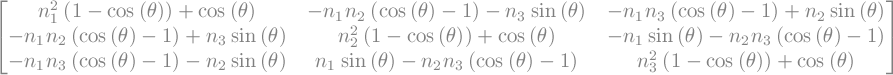

In [3]:
# Define the components of n and the angle theta:
# These are all real values, so we're telling sympy about that with the real=True keyword input to symbols
n1, n2, n3, th = symbols("n_1, n_2, n_3, theta", real=True)
# Define the nhat vector:
nhat = Matrix([n1, n2, n3])
# Evaluate the Rodrigues equation
aCb = simplify(
    cos(th) * eye(3) + (1 - cos(th)) * nhat * nhat.transpose() + sin(th) * skew(nhat)
)
# Note the use of the sympy cos, sin, and eye functions.  The last generates the identity matrix.
# In code blocks, we'll be using the aCb convention for naming DCMs. aCb = {}^\mathcal{A}C^\mathcal{B} in markdown blocks.
aCb

At first blush, that looks absolutely ghastly, but upon further inspection...well, it still looks pretty gross.  But there are some notable features here.  In particular, pay attention to the fact that the diagonal elements are qualitatively different from the off-diagonal ones.  The diagonal is solely a function of the squares of the measure numbers of $\bhat{n}$ and $\cos\theta$, while the off-diagonal terms are functions of both $\cos\theta$ and $\sin\theta$ as well as products of pairs of $\bhat{n}$ components.   Finally, don't forget that $n_1, n_2, n_3$ are not mutually independent.  They represent components of a unit vector, which means that their magnitude must be unity:
$$ \sqrt{n_1^2 + n_2^2 + n_3^2} = 1$$

## Inverting the Rodrigues Equation

It would be nice to be able to perform the inverse calculation - that is, to compute the axis and angle of rotation from a DCM. It is actually relatively straightforward to do so by inspecting the DCM we produced via the Rodrigues equation. Note that the diagonal elements of the matrix each contain one element of the rotation axis (squared) along with $\cos\theta$ terms.  Let's see what happens when we add all of these together:

In [4]:
# the trace method sums the diagonal of a matrix
collect(aCb.trace(), (1-cos(th)))

This is where we can use the fact that the rotation axis is a unit vector, by replacing the sum of the squares of the vector's components with 1:

In [5]:
collect(aCb.trace(), (1-cos(th))).subs(n1**2 + n2**2 + n3**2, 1)

Thus, we have just shown that we can find the rotation angle from the trace of a DCM, as:
$$ \cos\theta = \frac{\Tr\left(\framerot{A}{B}\right) - 1}{2}$$ 

Isolating the components of the rotation axis is a bit more complex, but here we are aided by the fact that there are pairs of off-diagonal elements in the DCM that have identical positive and negative along with isolated terms of the form $n_i\sin(\theta)$. For example: $\framerot{A}{B}_{32} - \framerot{A}{B}_{23} = 2n_1\sin(\theta)$. We can thus build a scaled version of the rotation axis from the DCM as:
$$[\bhat{n}]_\mc A = \frac{1}{2\sin(\theta)}\begin{bmatrix}
\framerot{A}{B}_{32} - \framerot{A}{B}_{23}\\
\framerot{A}{B}_{13} - \framerot{A}{B}_{31}\\
\framerot{A}{B}_{21} - \framerot{A}{B}_{12}
\end{bmatrix}_\mc A$$
We can find $\sin(\theta)$ from $\cos(\theta)$ by way of the Pythagorean identity - $\sin(\theta) = \sqrt{1 - \cos^2(\theta)}$.

<div class="alert alert-block alert-danger">
Learn to hate and fear everything related to trigonometric identities and the domains and ranges of trigonometric functions.  In particular: the range of both sine and cosine is [-1, 1], however, in taking the square root of $1 - \cos^2(\theta)$, we must pick just one value, and, by default, we typially pick the positive value, meaning that the right-hand side of the equation we just stated represents $\sin(\theta)$ is only in the range of [0,1].  Is this a problem?  In this case, not really. By guaranteeing that $\sin(\theta)$ is positive, we are effectively allowing for the sign on $\bhat{n}$ to flip as needed to properly encode the rotation.  That is, is you start with a rotation of more than $\pi$ radians about $\bhat{n}$, generate the equivalent DCM, and then use the procedure above to compute the axis and angle of the rotation from the DCM, you will find an angle of $2\pi$ minus your original angle, and an axis of $-\bhat{n}$.  Try it out and convince yourself that this is true.
</div>

To summarize:
<div class="alert alert-block alert-info">
    Given $\framerot{A}{B}$, we can find the equivalent axis and angle as:
    $$\theta = \cos^{-1}\left(\frac{\Tr\left(\framerot{A}{B}\right) - 1}{2}\right)$$
    $$[\bhat{n}]_\mc A = \frac{1}{2}\left(1 - \frac{\Tr\left(\framerot{A}{B}\right) - 1}{2} \right)^{-\frac{1}{2}}\begin{bmatrix}
\framerot{A}{B}_{32} - \framerot{A}{B}_{23}\\
\framerot{A}{B}_{13} - \framerot{A}{B}_{31}\\
\framerot{A}{B}_{21} - \framerot{A}{B}_{12}
\end{bmatrix}_\mc A$$
</div>

Let's see what happens if we apply our inversion algorithm to the DCM we just computed:

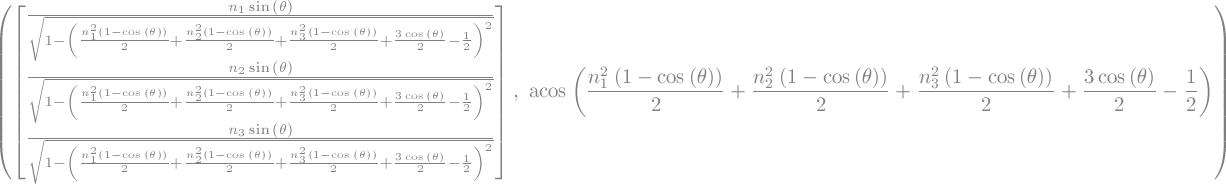

In [6]:
costh = (aCb.trace() - 1) / 2
sinth = sqrt(1 - costh**2)
# the indexing gets a bit tricky - make sure you agree with this step
tmp = Matrix([aCb[2, 1] - aCb[1, 2], aCb[0, 2] - aCb[2, 0], aCb[1, 0] - aCb[0, 1]])
ncalc = tmp / 2 / sinth
thcalc = acos(costh)

ncalc, thcalc

Once again, these look awful, and we need to help the solver out a bit with the unit vector constraint that it does not know about:

In [7]:
simplify(thcalc.subs(n3**2, 1 - (n1**2 + n2**2)))

<div class="alert alert-block alert-danger">
See what I meant about hating and fearing these things?  sympy will never, ever admit to you that $\cos^{-1}(\cos(\theta)) = \theta$ because it has learned this lesson well.  But, in our heart of hearts, we know it to be true. 
</div>

Similarly:

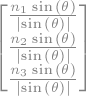

In [8]:
simplify(ncalc.subs(n3**2, 1 - (n1**2 + n2**2)))

Again, sympy will never simplify beyond this, for the simple reason that $\sin(\theta)/\vert\sin(\theta)\vert$ can be either +1 or -1.  Depending on which it is, the direction of the rotation axis will flip by $\pi$ radians, and we will get exactly the correct result.

Note that we have now assembled enough machinery to explicitly test an earlier assertion: that the matrix representation of the rotation axis is identical in both of the frames in the rotation. This would mean that we could apply our DCM to our derived axis of rotation and get back exactly the original components.  Let's take a look:

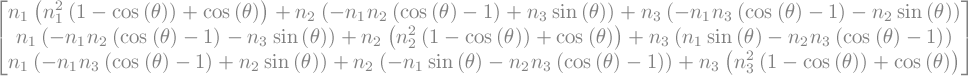

In [9]:
aCb.T*nhat

Not quite what we were hoping for but note that there's an $n_i^2$ term in each row.  We can make this work:

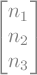

In [10]:
tmp = simplify((aCb.T*nhat).subs(n3**2, 1 - (n1**2 + n2**2)))
tmp = simplify(tmp.subs(n2**2, 1 - (n1**2 + n3**2)))
tmp = simplify(tmp.subs(n1**2, 1 - (n2**2 + n3**2)))
tmp

Alternatively, we can do the same thing with the axis computed from the DCM.

<div class="alert alert-block alert-warning">
<b>Exercise</b><br>Do the same thing with the axis computed from the DCM.
</div>

In [11]:
# here's some room to play.  Convince yourself that everything above works as advertised.

# Inverse Rotations

Let's back up a bit and note that $[\mf r]_\mc A = \framerot{A}{B} [\mf r]_\mc B$ is a pure statement of linear algebra.  All three components of the equation ($\framerot{A}{B}, [\mf r]_\mc A$, and $[\mf r]_\mc B$) are matrices, and are operated upon via matrix multiplication.  As such, we should be able to invert the operation by left-multiplying (remember, matrix multiplication is *not* commutative) by the inverse of $\framerot{A}{B}$, like so:
$$[\mf r]_\mc B = \left(\framerot{A}{B}\right)^{-1}[\mf r]_\mc A$$

While it is possible (although tedious) to find the inverse of a 3x3 matrix, in this case, there's an easier option: this inverse matrix ($\left(\framerot{A}{B}\right)^{-1}$) must be related to the dyadic encoding of the rotation of $\mf b$ into $\mf a$.  At this point, we could potentially go all the way back to the <a href="#fig:simprot1" >figure</a> defining our $\mf a$ and $\mf b$ vectors, and then re-derive a version of the Rodrigues equation that gives us the dyadic $\mb R^T$ such that $\mf a = \mb R^T \cdot \mf b$.
<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Go all the way back to the <a href="#fig:simprot1" >figure</a> defining our $\mf a$ and $\mf b$ vectors, and then re-derive a version of the Rodrigues equation that gives us the dyadic $\mb R^T$ such that $\mf a = \mb R^T \cdot \mf b$.
</div>

Hope you had fun on that little journey there. But you have to ask yourself: "was that trip really necessary?"  What if, instead, we used our physical understanding of what the rotation dyadic is doing in order to derive its inverse?  The rotation dyadic $\mb R$, that we so carefully derived the exact form of, above, it rotating a vector $\mf a$ about an axis $\bhat{n}$ by an angle $\theta$ in order to generate a vector $\mf b$, whose magnitude is the same as that of $\mf a$ but whose direction is now changed due to the rotation.  What is the inverse of this process?  Well, it's rotating vector $\mf b$ about axis $\bhat{n}$ by an angle $-\theta$ (remember our right-handed, counter-clockwise positive convention) to get back to vector $\mf a$.  So, in essence, the only difference between $\mb R$ and its inverse operator (which we'll call, for absolutely no particular reason whatsoever) $\mb R^T$ is the sign of the rotation angle. What happens to the Rodrigues equation if the sign of $\theta$ is flipped?  Well, cosine is an even function, meaning that it doesn't care about the sign of its argument, while sine is an odd function, meaning that $\sin(-\theta) \equiv -\sin(\theta)$.  So it appears that only one term out of the whole Rodrigues equation changes when the sign of $\theta$ changes.  

Let's take a look at the resulting matrix:

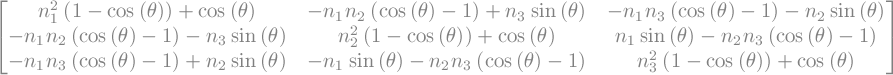

In [12]:
# Evaluate the Rodrigues equation for -theta
simplify(
    cos(-th) * eye(3) + (1 - cos(-th)) * nhat * nhat.transpose() + sin(-th) * skew(nhat)
)

Huh. Well, that's interesting.  It looks a lot like the $\framerot{A}{B}$ matrix, doesn't it?  In fact, almost exactly the same, except with all of the off-diagonal elements reflected about the diagonal.  Wait a sec. We know what that is - that's a matrix transpose!

<div class="alert alert-block alert-danger">
Ok, ok, we did have a reason for calling the inverse dyadic $\mb R^T$.
</div>

Just to be sure, let's verify:

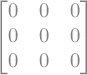

In [13]:
# Let's subtract our new inverse dyadic matrix representation from the transpose
# of the original matrix
(
    simplify(
        cos(-th) * eye(3)
        + (1 - cos(-th)) * nhat * nhat.transpose()
        + sin(-th) * skew(nhat)
    )
    - aCb.transpose()
)

So, yes, the matrix representation of the inverse dyadic $\mb R^T$ is the transpose of the matrix representation of $\mb R$. We will call this new quantity $\framerot{B}{A}$.  We started out this discussion by positing that the matrix representation of $\mb R^T$ should be equivalent to the inverse of $\framerot{A}{B}$, but now we have apparently found that it is its transpose.  Is it possible that the inverse and transpose of this matrix are the same?  Let's see:

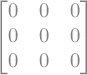

In [14]:
# While we could ask sympy to invert the matrix symbolicaly, that is actually a pretty big ask
# for most computers. It would eventually (probably) return a result, but who has the time?
# Instead, let's substitute some numerical values into the matrix, and do the comparison based
# on that. We'll take n_i = 1/sqrt{3} (remember that the values have to be normalized to 1)
# and a theta of 30 degrees (in radians)
aCb_vals = aCb.subs({n1: 1 / sqrt(3), n2: 1 / sqrt(3), n3: 1 / sqrt(3), th: pi / 6})
simplify(
    aCb_vals.transpose() - aCb_vals.inv()
)  # note the use sympy Matrix inv() method for the inverse.

In [15]:
# Try out the inverse and transpose comparison with some alternate values.
# Remember: theta can be anything at all, but n1^2 + n2^2 + n3^2 must equal 1.

That numerical comparison might not be hugely satisfying, so we're not going to leave it there, but before we go on, let's consolidate what we've learned so far into one of our helpful blue boxes:
<div class="alert alert-block alert-info">
$$\framerot{A}{B} \triangleq [\mb R]_\mc A \equiv [\mb R]_\mc B = \cos\theta I +  (1 - \cos\theta)[\bhat{n}]_\mc A [\bhat{n}]^T_\mc A + \sin\theta [\mf n \times]_\mc A$$
$$\framerot{B}{A} \triangleq [\mb R^T]_\mc A \equiv [\mb R^T]_\mc B \equiv \left(\framerot{A}{B}\right)^{-1} \equiv \left(\framerot{A}{B}\right)^{T} = \cos\theta I +  (1 - \cos\theta)[\bhat{n}]_\mc A [\bhat{n}]^T_\mc A - \sin\theta [\mf n \times]_\mc A$$
$$[\mf r]_\mc A = \framerot{A}{B} [\mf r]_\mc B$$
$$[\mf r]_\mc B = \framerot{B}{A} [\mf r]_\mc A$$
</div>

Once again, note that the adopted nomenclature for the DCMs is intended to help remind you of their operation in terms of transforming the components of a single vector between two different reference frames.

# SO(3)

That was a little weird.  Like, matrix inverses don't usually equal their transposes, right?

<div class="alert alert-block alert-danger">
Right.  In general, $A^T \ne A^{-1}$ for an arbitrary matrix $A$.  
</div>

So, what's going on here?  It turns out, all rotation operators of the form that we've been describing here belong to something called the **special orthogonal** (SO) group.  In this case, since we are dealing with 3 dimensional rotations, our DCMs are specifically in SO(3).  Matrix representations of rotation operators have columns that are both normalized to unity and that are mutually orthogonal.  Let's see if we can verify this with the matrix form we developed from the Rodrigues equation.  Remember that orthogonal vectors must have zero dot products, and so if we treat pairs of matrix columns as vector components, they should dot to zero:

In [16]:
# Remember that Python indexing is 0-based so the first element of anything has an index of 0
# The : index operator returns everything in a given dimension.  So aCb[:,0] is the first
# column (all rows) of aCb
simplify(expand(aCb[:, 0].dot(aCb[:, 1])))
# Note the use of both the expand and simplify commands to get the most compact final form of the solution

Hmm.  Not exactly zero. Or is it?  Remember, the components of $\bhat{n}$ are not unique, and $n_1^2 + n_2^2 + n_3^2 = 1$, so, in fact, the contents of the final parentheses equal zero.  We can similarly verify the other two combinations of columns:

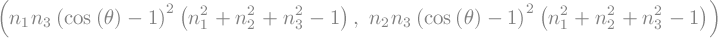

In [17]:
simplify(expand(aCb[:, 0].dot(aCb[:, 2]))), simplify(expand(aCb[:, 1].dot(aCb[:, 2])))

So far so good.  

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Demonstrate that the columns of $\framerot{A}{B}$ are all normalized to 1.
</div>

Here's some code space to work in:

In [18]:
# A useful thing to know here is that sympy matrices have a .norm() method that returns their
# magnitude. Alternatively, the square of the magnitude of a vector is equal to its dot product
# with itself.  You will likely have to fight sympy for a while to get to the simplification
# you want.  Or you could just do it by hand.

Ok. So it looks like DCMs are orthonormal, which instantly opens up a whole slew of cool properties, chief among them that $C^TC = CC^T = I$ for orthonormal matrix $C$ (i.e., every orthonormal matrix commutes with its transpose, and the product with its transpose yields the identity matrix).  This directly leads to the observation that $C^T \equiv C^{-1}$.  Finally, in general, an orthonormal matrix has a determinant of positive or negative 1.  SO(3) only contains the subgroup of orthonormal matrices whose determinant is positive 1. 

# Basis Vector DCMs

There is an incredibly important class of DCMs that we will be returning to again and again.  These are the matrices representing rotations where the axis of rotation is one of the unit vectors defining the reference frame.  Note that we didn't specify which reference frame, initial or final (what we've been calling $\mc A$ and $\mc B$).  That's because the axis of rotation is the only direction that's the same between the two frames.  So, these are the DCMs encoding rotations between frames that share one of their unit vectors. Again defining our frames as $\mc A = (\bhat{a}_1, \bhat{a}_2, \bhat{a}_3)$ and $\mc B = (\bhat{b}_1, \bhat{b}_2, \bhat{b}_3)$, respectively, we can draw the three cases where $\mc B$ is a counterclockwise $\theta$ rotation about $\bhat{a}_1$ or $\bhat{a}_2$ or $\bhat{a}_3$.  In each of these cases, there will be on shared unit vector between the two frames: $\bhat{b}_1 \equiv \bhat{a}_1$, $\bhat{b}_2 \equiv \bhat{a}_2$, or $\bhat{b}_3 \equiv \bhat{a}_3$, respectively:

<p style="text-align:center;"><img src="img/dcm1.png" alt="Axis 1 DCM" width="300" id="fig:dcm1"/><img src="img/dcm2.png" alt="Axis 2 DCM" width="300" id="fig:dcm2"/><img src="img/dcm3.png" alt="Axis 3 DCM" width="300" id="fig:dcm3"/></p>

Note that while $\theta$ is drawn between only one pair of unit vectors in each image, the same angle separates the other pair - for example, when rotating about $\bhat{a}_1 \equiv \bhat{b}_1$ the angle between $\bhat{a}_2$ and $\bhat{b}_2$ is the same as the angle between  $\bhat{a}_3$ and $\bhat{b}_3$. In each case, the shaded region represents the $\bhat{a}_1 - \bhat{a}_2$ plane (equivalently the $\bhat{b}_1 - \bhat{b}_2$ plane.  Remember that in each case, the rotation shows in counter-clockwise when viewed looking *down* the rotation axis (which is why the $\bhat{a}_2 \equiv \bhat{b}_2$ rotation may look qualitatively different from the others.

Let's see if we can use our previously developed formalism to find the DCMs associated with each of these.  In each case, we're going to be finding the $\framerot{B}{A}$ DCM:

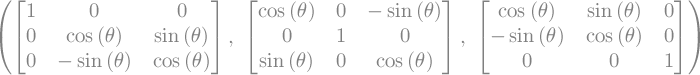

In [19]:
# Let's define a helper method to calculate these:
def DCM(nhat, th):
    return simplify(
        cos(th) * eye(3)
        + (1 - cos(th)) * nhat * nhat.transpose()
        - sin(th) * skew(nhat)
    )
    # note the negative sign on the last term


# Now we can calculate the three DCMs corresponding to rotations about the three unit axes:
C1 = DCM(Matrix([1, 0, 0]), th)
C2 = DCM(Matrix([0, 1, 0]), th)
C3 = DCM(Matrix([0, 0, 1]), th)

C1, C2, C3

Wow! That looks so much nicer than the general case. And we can finally discern a clear structure to these. Each of them has a row/column of zeros with a single 1 value.  This always corresponds to the axis of rotation (because components along this axis are not transformed by the rotation). The remainder of each matrix is a block of two cosine and two sine terms, with the cosines on the diagonal and sines off diagonal, with a single negative value on one of the signs.  Again not the qualitative difference in the arrangement of the DCM corresponding to rotations about the second unit directions.

Because we will be using these so much, we're going to reproduce the result here and treat these three DCMs as functions of $\theta$:

<div class="alert alert-block alert-info">
$$C_1(\theta) \triangleq \left[\begin{matrix}1 & 0 & 0\\0 & \cos{\left(\theta \right)} & \sin{\left(\theta \right)}\\0 & - \sin{\left(\theta \right)} & \cos{\left(\theta \right)}\end{matrix}\right]\qquad C_2(\theta) \triangleq \left[\begin{matrix}\cos{\left(\theta \right)} & 0 & - \sin{\left(\theta \right)}\\0 & 1 & 0\\\sin{\left(\theta \right)} & 0 & \cos{\left(\theta \right)}\end{matrix}\right] \qquad C_3(\theta) \triangleq  \left[\begin{matrix}\cos{\left(\theta \right)} & \sin{\left(\theta \right)} & 0\\- \sin{\left(\theta \right)} & \cos{\left(\theta \right)} & 0\\0 & 0 & 1\end{matrix}\right]$$
</div>
Remember, each of these describes the $\framerot{B}{A}$ DCM.  Taking their transposes provides the $\framerot{A}{B}$ DCMs.  The only difference between them is the placement of a negative sign in a single matrix element, so it is incredibly easy to make mistakes.  Be careful!

<div class="alert alert-block alert-danger">
Want to know a secret?  We just made that blue block by right-clicking on the output of the code block above, selecting 'Show Math As>TeX Commands', and then copying/pasting.  What?  Did you really think any of this was done by hand?
</div>

Let's take a second to focus in on one of these DCMs and see if we can tie up everything we've done so far.
<p style="text-align:center;"><img src="img/dcm3b.png" alt="Axis 3 DCM" width="500" id="fig:dcm3b"/></p>

The new <a href="#fig:dcm3b" >figure</a> again shows a rotation about the $\bhat{a}_3\equiv \bhat{b}_3$ axis, but is reoriented from the previous version such that the shaded region represents the $\bhat{a}_1-\bhat{a}_3$ plane.  We've already made the point that the angle between $\bhat{a}_1$ and $\bhat{b}_1$ must be the same as the angle between $\bhat{a}_2$ and $\bhat{b}_2$. We label this angle as $\theta$.  We now also note that the angle between $\bhat{b}_1$ and $\bhat{a}_1$ must be the complement of $\theta$ (since the angle between $\bhat{a}_1$ and $\bhat{a}_2$  is exactly 90$^\circ$ and $\bhat{b}_1$ must lie in the same planet as these vectors for a rotation about $\bhat{b}_3$.

Remember that the direction cosine matrix gets its name from the fact that each entry represents the cosine between each pair of unit vectors of the two frames.  We have previously expressed this mathematically as: $\left[ \framerot{A}{B}\right]_{ij} = \bhat{a}_i \cdot \bhat{b}_j$.  Since $\framerot{B}{A}$ is the transpose of $\framerot{A}{B}$, and the transpose has the effect of reversing matrix indices, we can equivalently write:
$$\left[ \framerot{B}{A}\right]_{ij} = \bhat{b}_i \cdot \bhat{a}_j $$

We will now apply this to every pair of unit vectors shown in the <a href="#fig:dcm3b" >figure</a>:
$$
\begin{split}
\bhat{b}_1 \cdot \bhat{a}_1 &= \cos\theta\\
 \bhat{b}_1 \cdot \bhat{a}_2 &= \cos\left(\frac{\pi}{2} - \theta\right) = \sin\theta\\
  \bhat{b}_2 \cdot \bhat{a}_1 &= \cos\left(\theta + \frac{\pi}{2} - \theta+ \theta\right) = -\sin\theta\\
  \bhat{b}_2 \cdot \bhat{a}_2 &= \cos\theta\\
  \bhat{b}_3 \cdot \bhat{a}_3 &= 1\\
  \bhat{b}_1 \cdot \bhat{a}_3 &= \bhat{b}_2 \cdot \bhat{a}_3 =  \bhat{b}_3 \cdot \bhat{a}_1 = \bhat{b}_3 \cdot \bhat{a}_2 = \cos\left(\frac{\pi}{2}\right) = 0
  \end{split}
$$

When package up in matrix form, this yields exactly the same result as the thing we just defined as $C_3(\theta)$.

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Add an arbitrary vector $\mf r$ to the  <a href="#fig:dcm3b" >figure</a> and decompose it into components in the $\mc A$ and $\mc B$ frame.  Demonstrate to yourself that $\framerot{A}{B}$ and $\framerot{B}{A}$ work as advertised.
</div>

# Dyadic Change of Basis

We have now established that the DCM between two frames can be used to convert the components of a vector expressed in one frame to components of the vector in the other via matrix multiplication, but how about dyadics?  Recall that we can represent $\mb T$ as an outer product of two vectors, such that $\mb T = \mf a \otimes \mf b$. In this case, the component representation of $\mb T$ with respect to some frame $\mc A$ would be  $[\mf a]_\mc A [\mf b]_\mc A^T$.  We can transform each of $\mf a$ and $\mf b$ to $\mc B$ frame components via the DCM $\framerot{B}{A}$, and so the $\mc B$ frame representation of $\mb T$ would be:
$$ \left[\mb T\right]_\mc B = \framerot{B}{A}[\mf a]_\mc A \left(\framerot{B}{A} [\mf b]_\mc A\right)^T = \framerot{B}{A}[\mf a]_\mc A[\mf b]_\mc A^T\framerot{A}{B} = \framerot{B}{A}\left[\mb T\right]_\mc A \framerot{A}{B} $$
where we have used the linear algebraic identity that the transpose of the product of matrices $A$ and $B$ is: $(AB)^T = B^TA^T$.

Thus, the frame representations of dyadics can be transformed via the exact same DCMs as vectors, save that we need to apply the DCM twice - left multiplying by the DCM and right multiplying by its transpose.

# Alternate Representations of the Rotation Dyadic

Before leaving this topic, it is worth mentioning that there are various other ways to build up the formalism that leads to our newfound understanding of direction cosine matrices.  Nor are we done with the topic of simple rotations, and will be returning to it once again, in a little while.  For now, however, let us consider two additional points.

We have already used the Rodrigues equation to find the matrix form of the DCM:
$$\framerot{B}{A} \triangleq [\mb R^T]_\mc A \equiv [\mb R^T]_\mc B \equiv \left(\framerot{A}{B}\right)^{-1} \equiv \left(\framerot{A}{B}\right)^{T} = \cos\theta I +  (1 - \cos\theta)[\bhat{n}]_\mc A [\bhat{n}]^T_\mc A - \sin\theta [\mf n \times]_\mc A$$

The entries of the resulting matrix can be encoded very compactly via the expression:
$$\left[\framerot{B}{A}\right]_{ij} =  \delta_{ij}\cos\theta + \underbrace{\epsilon_{ijk}}_{k \ne i,j}n_k\sin\theta + n_in_j(1 - \cos\theta) $$

Here, $\delta_{ij}$ is the Kronecker Delta, named after Leopold Kronecker - a German mathematician who had a distaste for any number that wasn't an integer.  The Kronecker Delta is defined as:
$$\delta_{ij} = \begin{cases}
1 & j = i\\
0 & j \ne i
\end{cases}$$
$\epsilon_{ijk}$ is the Levi-Civita symbol, named after Italian mathematician Tullio Levi-Civita, who made seminal contributions to tensor calculus and celestial mechanics, and rocked a mean mustache.  The symbol is defined via three indices, where the third ($k$) in our case is taken to be whichever value of 1,2,3 is not equal to either $j$ or $k$, such that:
$$\epsilon_{ijk} = \frac{1}{2}(i-j)(j-k)(k-i)
= \begin{cases}
1 & \textrm{Even permutations}\\
-1 & \textrm{Odd permutations}\\
0 & \textrm{Repeated indices}\end{cases}
$$

Another alternative representation of the matrix is given by:
$$\framerot{B}{A} = \exp\left(-\theta \left[\bhat{n}\times\right]_\mc A\right)$$

That is, the DCM is equivalent to the matrix exponential of negative the rotation angle multiplied by the cross-product equivalent (skew-symmetric) matrix of the rotation axis.

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Demonstrate that these two encodings of $\framerot{B}{A}$ are equivalent to the one found directly from the Rodrigues equation.
</div>

In [20]:
# This is just here to generate the link to the next notebook
genNextLink()

# [Next](<05-More Reference Frames.ipynb>)